### Parte 4: Revisión de casos

El objetivo de este fichero es intentar caracterizar cada uno de los casos del conjunto de validación. Para ello, comenzaremos mostrando estadísticos básicos, matriz de correlaciones respecto de las componentes vectoriales del viento, y luego algunos gráficos de caja para revisar la distribución de las variables. 


#### 4.1 Estadísticos básicos por mapa

In [17]:
import pandas as pd 
import numpy as np 


def mostrar_stats(var_name): 

    var_names  =["u10", "v10", "hgt", "xland", "pblh", "psfc", "th2", "t2"]
    fechas_val =["2019_08_23", "2022_11_25", "2015_10_21", "2019_11_20", 
                 "2019_11_06", "2020_11_13","2022_07_16", "2022_08_10"]
    stats_names= ["min", "max", "mediana", "mean", "std", "var"]
    info       = pd.DataFrame(index=fechas_val, columns=stats_names)

    if var_name not in var_names: 
        return print("Nombre de la variable no encontrado")
    
    else: 
        var_array = np.load(f"../../parches_winscp/bicubic_32_32/190824_16_va/raw/{var_name}_input_raw_190824_16_va.npy")[:,:,:,0]

    for i in range(8): 
        var_array_i = var_array[i*(115*156):(115*156)*(i+1)]

        media_global    = np.mean(var_array_i)
        std_global      = np.std(var_array_i)
        varianza_global = np.var(var_array_i)
        med_global      = np.median(var_array_i)
        min_global      = np.min(var_array_i)
        max_global      = np.max(var_array_i)

        info.loc[ fechas_val[i]] = [min_global, max_global, med_global, media_global, std_global, varianza_global]

    print(f"Estadísticos para la variable {var_name}")
    return info 

mostrar_stats("pblh")

Estadísticos para la variable pblh


,min,max,mediana,mean,std,var
2019_08_23,-236.52861,2057.093506,438.045959,535.429688,395.514465,156431.703125
2022_11_25,-175.254974,1827.174072,186.035355,239.233002,203.423019,41380.925781
2015_10_21,-339.245178,2519.669678,335.202942,406.625549,331.59433,109954.796875
2019_11_20,-211.960922,2639.664062,218.848694,333.486328,323.578064,104702.757812
2019_11_06,-165.556259,1707.768677,253.180145,309.690704,231.035706,53377.5
2020_11_13,-149.328873,1822.803955,370.707825,404.334808,256.033447,65553.132812
2022_07_16,-261.921967,2096.231689,533.035889,577.11145,371.340027,137893.421875
2022_08_10,-388.646454,2592.646973,537.214966,623.892212,457.009308,208857.515625


#### 4.2 Estadísticos por cuadrante: 

In [27]:
var_names  =["u10", "v10", "hgt", "xland", "pblh", "psfc", "th2", "t2"]
fechas_val =["2019_08_23", "2022_11_25", "2015_10_21", "2019_11_20", 
                 "2019_11_06", "2020_11_13","2022_07_16", "2022_08_10"]
stats_names= ["min", "max", "mediana", "mean", "std", "var"]
info       = pd.DataFrame(index=fechas_val, columns=stats_names)


var_array = np.load(f"../../parches_winscp/bicubic_32_32/190824_16_va/raw/{var_names[0]}_input_raw_190824_16_va.npy")[:,:,:,0]

array_156= [] 

for i in range(156): 
    casos= []
    var_array_i = var_array[i::156]

    for j in range(8): 
      
        var_array_j = var_array_i[115*j: 115*(j+1)]

        media_global    = np.mean(var_array_j)
        std_global      = np.std(var_array_j)
        varianza_global = np.var(var_array_j)

        casos.append( [media_global, std_global, varianza_global] ) 

    array_156.append(casos)


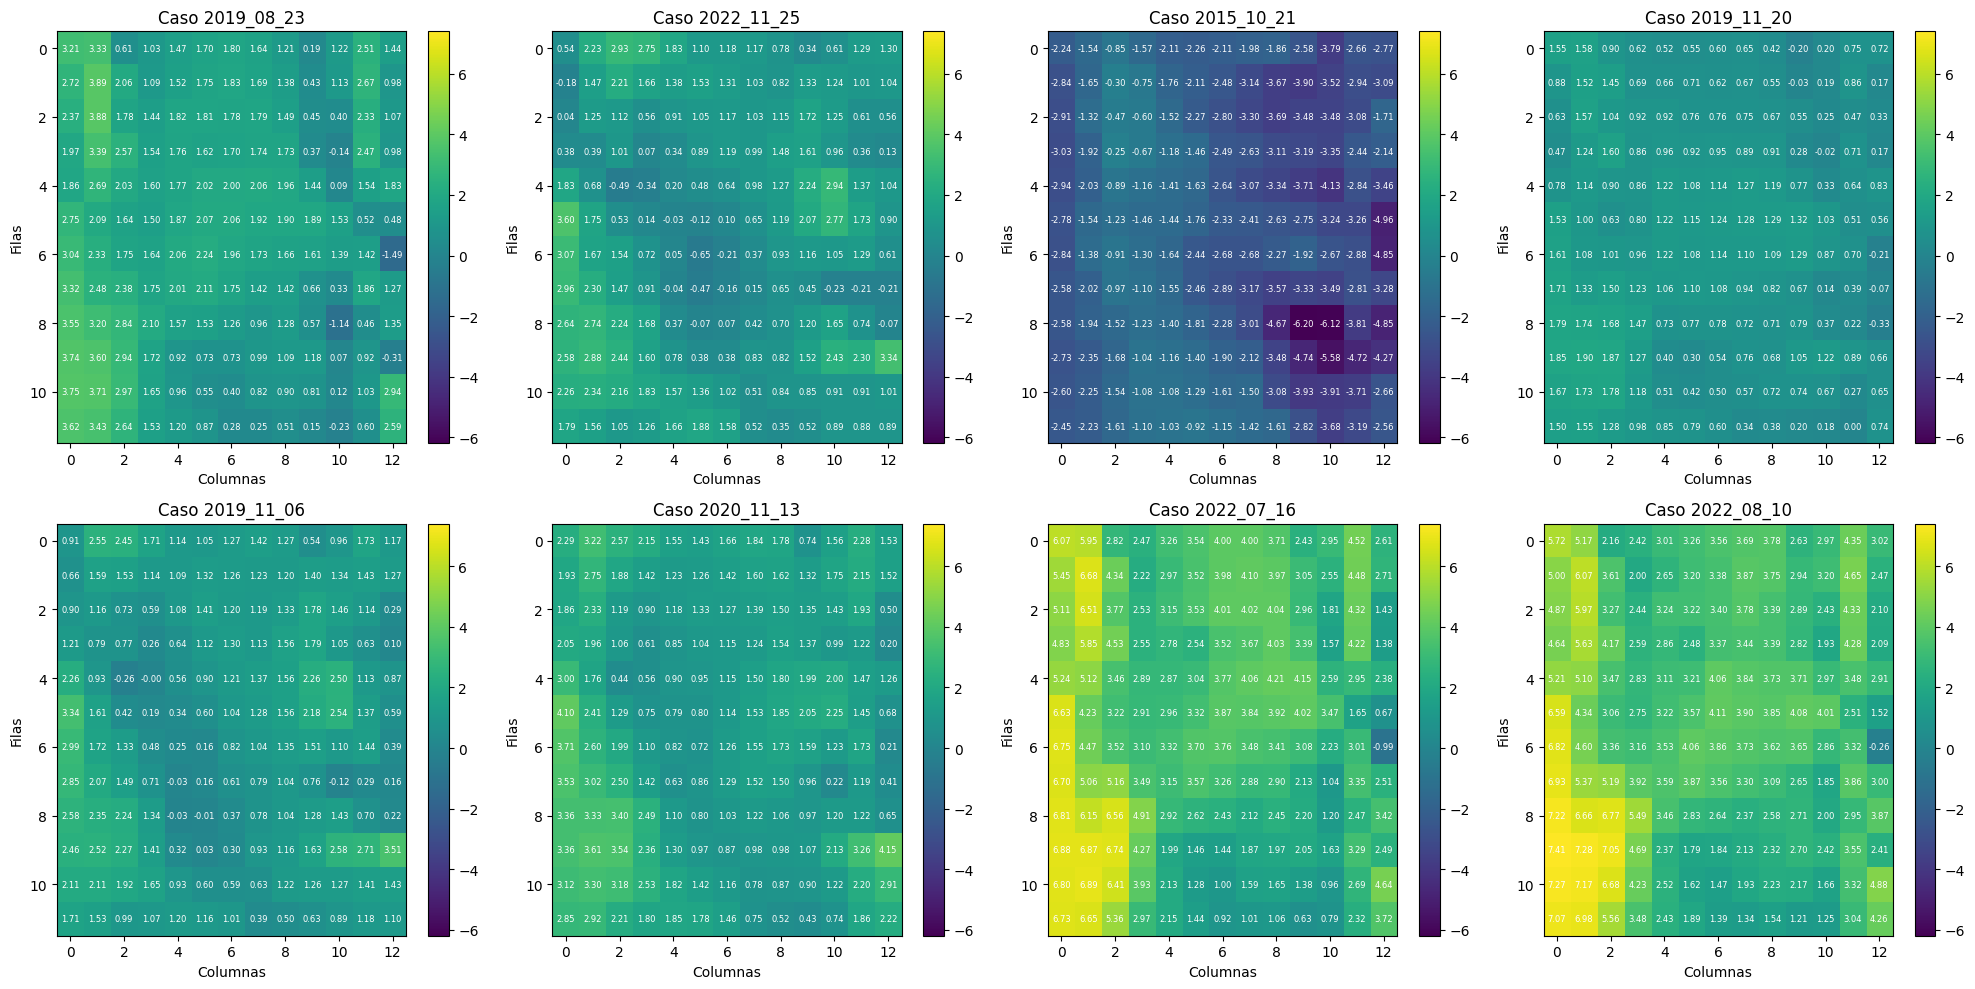

In [74]:
import matplotlib.pyplot as plt

# Paso 1: Generar datos de ejemplo (8 matrices de tamaño 12x13)
data_list = [  np.array([valor[i][0] for valor in array_156]).reshape((12, 13)) for i in range(8)]
titles = [f'Caso {fechas_val[i]}' for i in range(8)]


all_data = np.concatenate(data_list, axis=0)  
vmax = all_data.max()

fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # 2 filas y 4 columnas

# Paso 4: Crear cada mapa de calor con sus personalizaciones
for ax, data, title in zip(axes.flat, data_list, titles):
    im = ax.imshow(data, cmap='viridis', aspect='auto', vmin=vmin, vmax=vmax)
    ax.set_title(title)
    ax.set_xlabel('Columnas')
    ax.set_ylabel('Filas')
    
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            ax.text(j, i, f'{data[i, j]:.2f}', ha='center', va='center', color='white', fontsize=6)

    plt.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()

#### 4.3 Matriz de correlación entre las variables

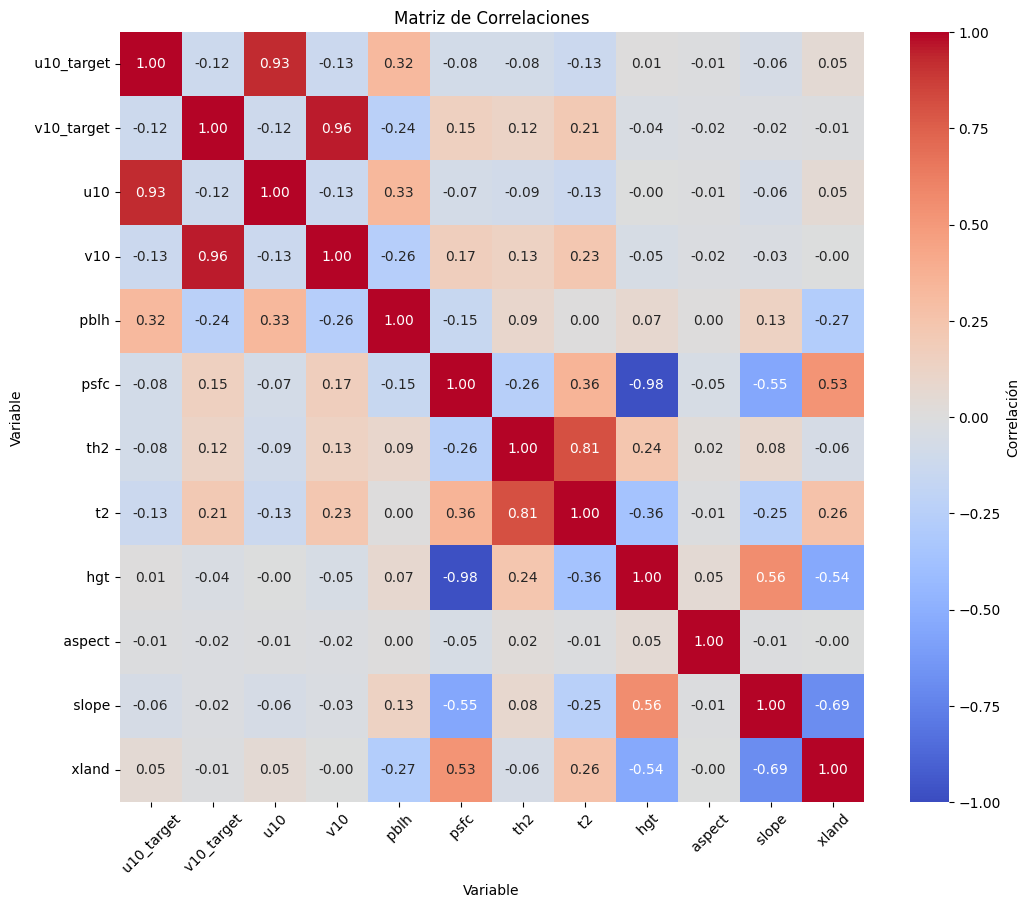

CPU times: user 7.54 s, sys: 52.1 s, total: 59.6 s
Wall time: 4min 20s


In [82]:
%%time 

import seaborn as sns

var_names  =["u10", "v10",  "pblh", "psfc", "th2", "t2", "hgt", "aspect", "slope", "xland",]


data_list = [ np.load(f"../../parches_winscp/bicubic_32_32/190824_16_va/raw/{var}_input_raw_190824_16_va.npy")[:,:,:,0] for var in var_names]

data_list = [ np.load(f"../../parches_winscp/bicubic_32_32/190824_16_va/raw/v10_target_raw_190824_16_va.npy")[:,:,:,0]] + data_list 
data_list = [ np.load(f"../../parches_winscp/bicubic_32_32/190824_16_va/raw/u10_target_raw_190824_16_va.npy")[:,:,:,0]] + data_list 

var_names = ["u10_target", "v10_target"] + var_names

flattened_data = [data.flatten() for data in data_list]

data_matrix = np.array(flattened_data)
correlation_matrix = np.corrcoef(data_matrix)

variable_names = [f' {var}' for var in var_names]  

# Paso 6: Graficar la matriz de correlaciones con etiquetas personalizadas
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, 
            cbar_kws={'label': 'Correlación'},
            xticklabels=variable_names,
            yticklabels=variable_names)
plt.title('Matriz de Correlaciones')
plt.xlabel('Variable')
plt.ylabel('Variable')
plt.xticks(rotation=45) 
plt.yticks(rotation=0)  
plt.show()
